In [47]:
# Módulos 
# !pip install sounddevice
# import sounddevice as sd

from scipy.io.wavfile import write
import scipy.io.wavfile
import numpy as np
from scipy.signal import resample
import matplotlib.pyplot as plt

plt.style.use("seaborn")

# Grabar la vocal sostenida /a/ por unos 3 a 5 segundos. Tasa de muestro de 8Khz.
Se utilizó el módulo `sounddevice` de Python y su función `rec` para grabar la voz durante 4 segundos, usando una tasa de muestreo de 8KHz, y 1 canal. El audio grabado se encuentra disponible en el archivo `a.wav`. Luego, el archivo generado fue cargado en un ambiente de trabajo Python utilizando el método `read` del módulo `scipy.io.wavfile`, y transformando los datos a un arreglo de `numpy`, obteniéndose un arreglo con las amplitudes de la señal, de dimensión `(32000,)`.

In [45]:
# Variables
fs = 8000  # Sample rate
filename = 'aa.wav'
ventana = 20

In [48]:
# Esta celda graba un audio (requiere instalar y cargar sounddevice)

seconds = 4  # Duración de la grabación
my_recording = sd.rec(int(seconds * fs), samplerate=fs, channels=1) # Realiza la grabación con la tasa de muestreo especificada por el tiempo especificado
sd.wait()  # Con esto se espera a que termine la grabación para continuar la ejecución
write(filename, fs, my_recording)  # Se genera archivo .wav una vez terminada la grabación

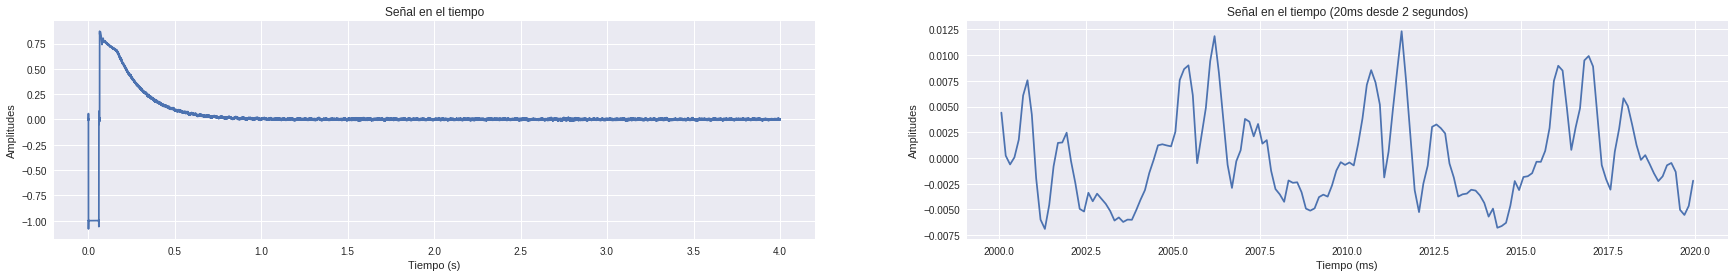

In [50]:
# Se grafica la señal

tiempos = np.linspace(0, len(amplitudes) / fs, num=len(amplitudes))

plt.figure(figsize=(30, 4))

plt.subplot(1, 2, 1)
plt.plot(tiempos, amplitudes)
plt.title("Señal en el tiempo")
plt.ylabel("Amplitudes")
plt.xlabel("Tiempo (s)")

plt.subplot(1, 2, 2)
plt.plot(tiempos[fs * 2: int(fs * 2 + fs * ventana / 1000)] * 1000, amplitudes[fs * 2: int(fs * 2 + fs * ventana / 1000)])
plt.title("Señal en el tiempo (20ms desde 2 segundos)")
plt.ylabel("Amplitudes")
plt.xlabel("Tiempo (ms)");

# Estimar $T$ y $f_0=\frac{1}{T}$ a mano. Considere que es constante durante toda la señal.